# Max

## Research question/interests

How are you most likely to reach your intended destination on time using air travel in the US? Taking things into account like departure/arrival location, airline choice, time of year etc. Or more generally, what is the absolute best time, airline, and route if you were trying to have a "perfect" trip. 

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
#import ProjectFunctions1 as p1

In [13]:
airlinedata1=pd.read_csv('../data/raw/Airline_Data_Jan2021-Dec2021.csv')
airlinedata2=pd.read_csv('../data/processed/airline_greviance_data_2021.csv')
airlinedata3=pd.read_csv('../data/processed/airline_data_filtered.csv').drop(['Unnamed: 0','carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'],axis=1)
# airlinedata1 doesn't include data on baggage etc.
us_map = gpd.read_file('../data/SHP files/States_shapefile.shp')
us_map=us_map.rename(columns={'State_Code':'Statecode'})
airlinedata3.head(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Statecode
0,2021,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",127.0,9.0,0.0,0.0,264.0,119.0,0.0,68.0,0.0,77.0,PA
1,2021,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",73.0,11.0,0.0,0.0,342.0,125.0,0.0,142.0,0.0,75.0,GA
2,2021,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,8.0,0.0,0.0,439.0,156.0,0.0,103.0,0.0,180.0,LA
3,2021,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",166.0,18.0,0.0,1.0,1266.0,291.0,693.0,167.0,0.0,115.0,GA
4,2021,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",52.0,6.0,0.0,0.0,497.0,278.0,180.0,21.0,0.0,18.0,NY


In [14]:
df3 = airlinedata3.groupby('Statecode')['weather_delay','arr_delay'].sum().reset_index()
airlinedata1=airlinedata1.drop(['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct'],axis=1)
airlinedata1['not_carrier_rltd']=airlinedata1['nas_delay']+airlinedata1['weather_delay']
df = airlinedata1.groupby('carrier_name')['not_carrier_rltd'].sum().reset_index()
airlinedata1['carrier_rltd']=airlinedata1['arr_cancelled']+airlinedata1['arr_diverted']+airlinedata1['arr_delay']+airlinedata1['carrier_delay']+airlinedata1['security_delay']+airlinedata1['late_aircraft_delay']
df1=airlinedata1.groupby('carrier_name')['carrier_rltd'].sum().reset_index()
df2 = airlinedata1.groupby('carrier_name')['arr_flights'].sum().reset_index()

C:\Users\maxti\AppData\Local\Temp\ipykernel_17752\3350257012.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = airlinedata3.groupby('Statecode')['weather_delay','arr_delay'].sum().reset_index()


In [15]:
airlinedata2['cancelled_per_flight'] = airlinedata2.apply(lambda x: x['cancelled_flights'] / x['total_flights'], axis=1)
airlinedata2['mishandeled_per_flight'] = airlinedata2.apply(lambda x: x['bags_mishandled'] / x['total_flights'], axis=1)
airlinedata2.head(5)

,Airline,month,total_flights,cancelled_flights,bags_mishandled,oversales,filed_complaints,cancelled_per_flight,mishandeled_per_flight
0,Envoy Air,1,17665,331,5193,408.0,8,0.018738,0.293971
1,Mesa Airlines,1,11232,172,2392,170.0,0,0.015313,0.212963
2,PSA Airlines,1,12615,373,2809,360.0,8,0.029568,0.222671
3,Republic Airways,1,21720,271,2850,217.0,8,0.012477,0.131215
4,SkyWest Airlines,1,52000,588,5084,720.0,8,0.011308,0.097769


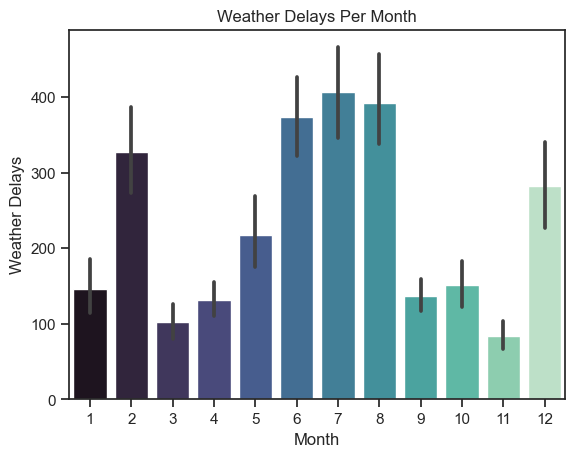

In [32]:
bar=sns.barplot(data=airlinedata1,x='month',y='weather_delay',palette='mako').set(xlabel="Month",ylabel="Weather Delays",title="Weather Delays Per Month")

#### This is interesting because I would assume that most weather delays would happen in the winter months. Although February and December have slight upticks in weather delays the most delays occur in July and August which is very strange given that these are the months when the weather is the best which makes one think that perhaps airlines blame delays on weather when it isn't actually the cause.

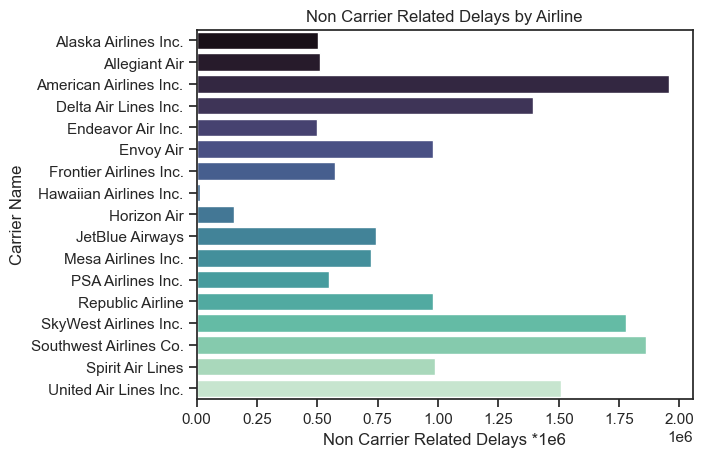

In [33]:
scatter=sns.barplot(data=df,x='not_carrier_rltd',y='carrier_name',palette="mako").set(xlabel="Non Carrier Related Delays *1e6",ylabel="Carrier Name",title="Non Carrier Related Delays by Airline")
#scatter.set_ylabel("Non Carrier Related Delays*1e6")
#scatter.set_xticklabels(labels=['Endeavor','American','Alaska','JetBlue','Delta','Frontier','Allegiant','Hawaiian','Envoy','Spirit','PSA','Skywest','Horizon','United','Southwest','Mesa','Republic'],rotation=60)

#### The most delays not in the control of the carrier comes from Alaska and Southwest airlines. This could be because Alaska especially serves destinations where weather is more extreme then most of the US. And Southwest has a business model that serves smaller,less mainstream destinations and airports which typically have worse technology which could result in more NAS delays when technology fails.

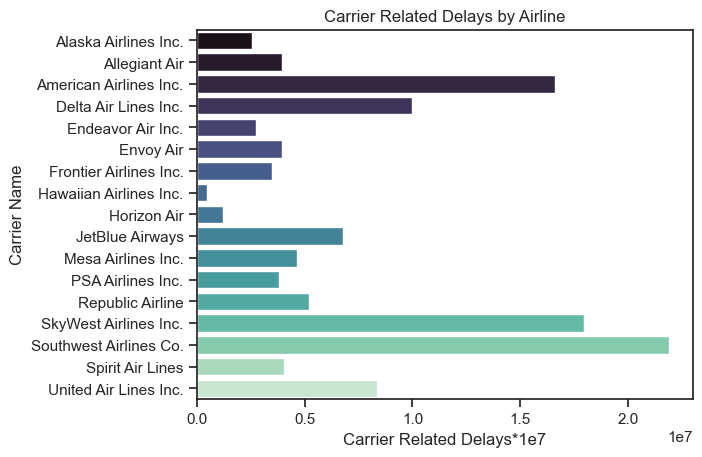

In [34]:
scatter=sns.barplot(data=df1,x='carrier_rltd',y='carrier_name',palette="mako").set(xlabel="Carrier Related Delays*1e7",ylabel="Carrier Name",title="Carrier Related Delays by Airline")
#scatter.set_xticklabels(labels=['Endeavor','American','Alaska','JetBlue','Delta','Frontier','Allegiant','Hawaiian','Envoy','Spirit','PSA','Skywest','Horizon','United','Southwest','Mesa','Republic'],rotation=60)
#scatter.set_ylabel("Carrier Related Delays")

#### The most carrier related delays happen to Southwest and United. This could be biased because of their large fleet sizes but American and Delta both have larger fleets and incure less delays. A surprising stat is the Allegiant, Frontier, and Spirit have relatively low carrier related delays even though they are consistently rated the worst airlines in America. It is not surprising that the regional  carriers like envoy, hawaiian and endeavor don't incure many delays since their fleets are small and the smaller aircraft take less time to turn around on the ground.

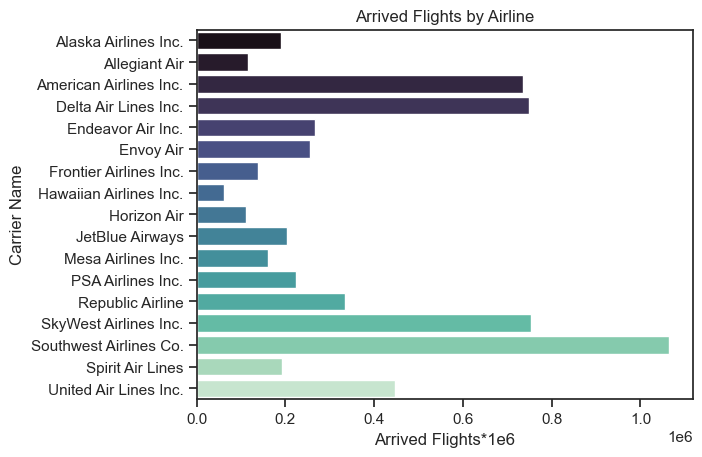

In [35]:
hist=sns.barplot(data=df2,x='arr_flights',y='carrier_name',palette="mako").set(xlabel="Arrived Flights*1e6",ylabel="Carrier Name",title="Arrived Flights by Airline")

#### Southwest easily has the most flights in the US. An unsurprising statistic since they have a large fleet size and opperate on a business model that promotes fast, frequent, convienient, and cheap travel.

<AxesSubplot:title={'center':'Weather Delays by State'}>

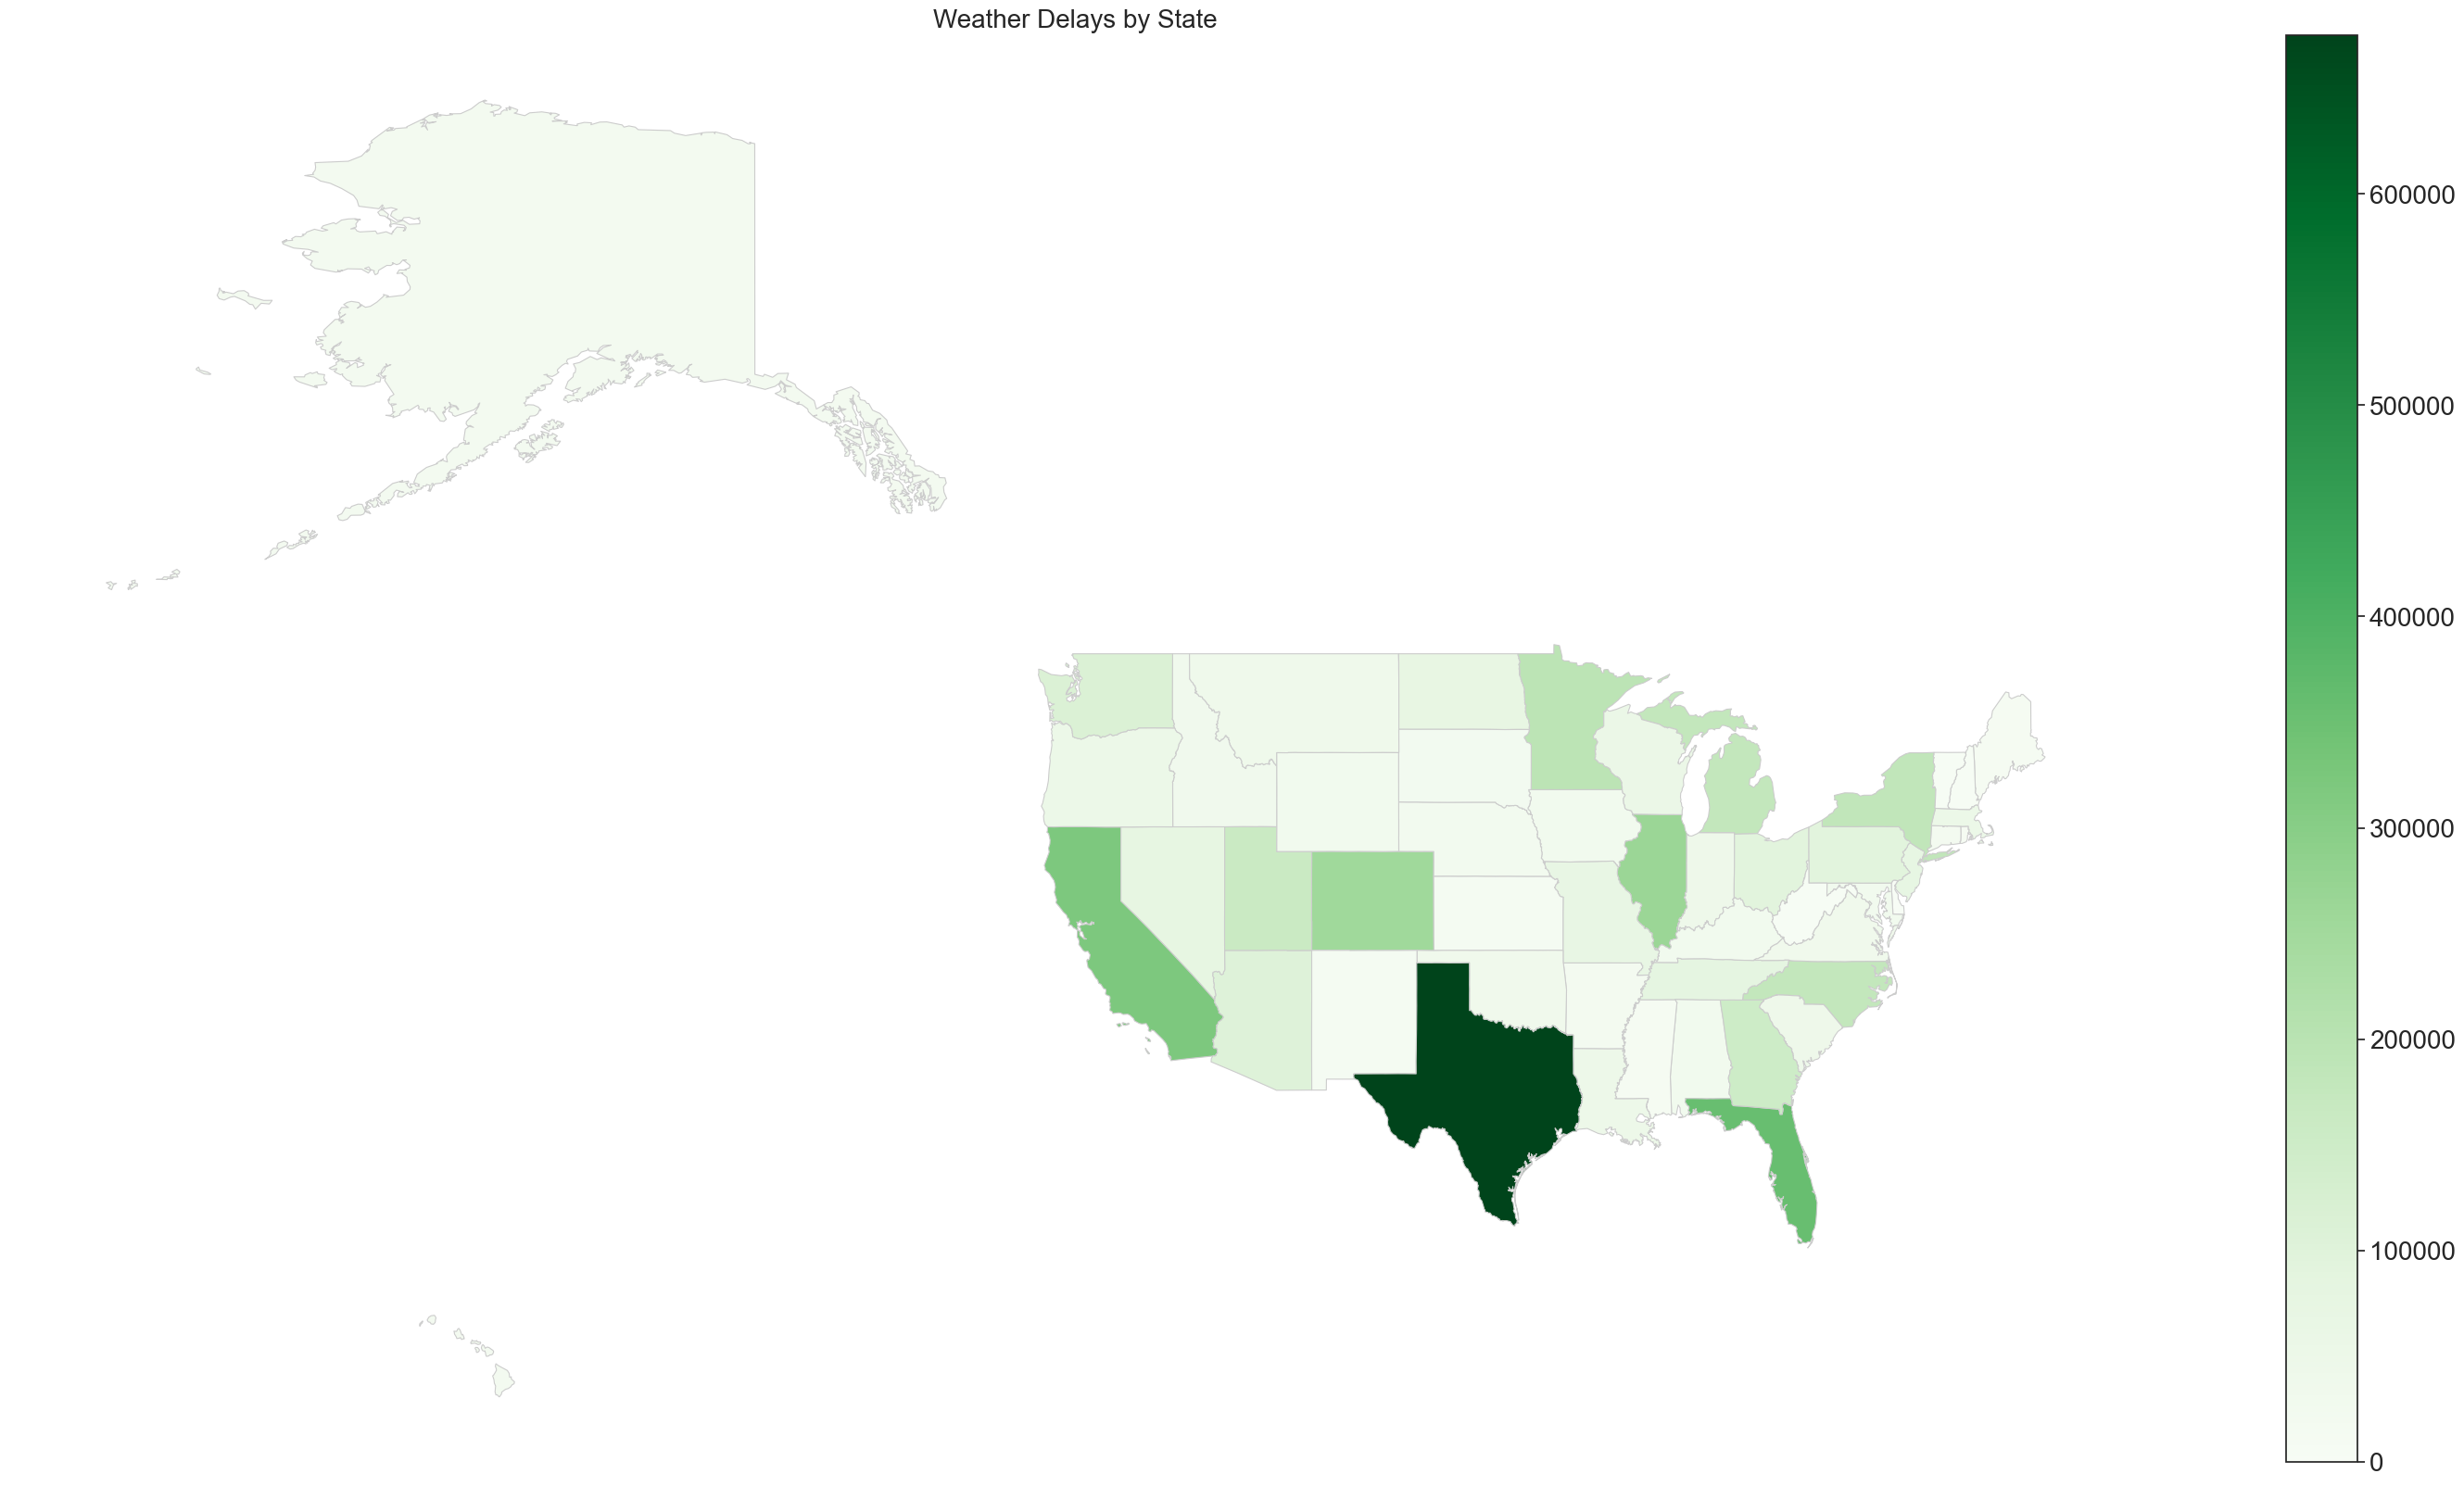

In [58]:
merged = us_map.set_index('Statecode').join(df3.set_index('Statecode'))
merged = merged.reset_index()
merged = merged.fillna(0)
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Weather Delays by State', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 675000
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)
merged.plot('weather_delay', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))


<AxesSubplot:>

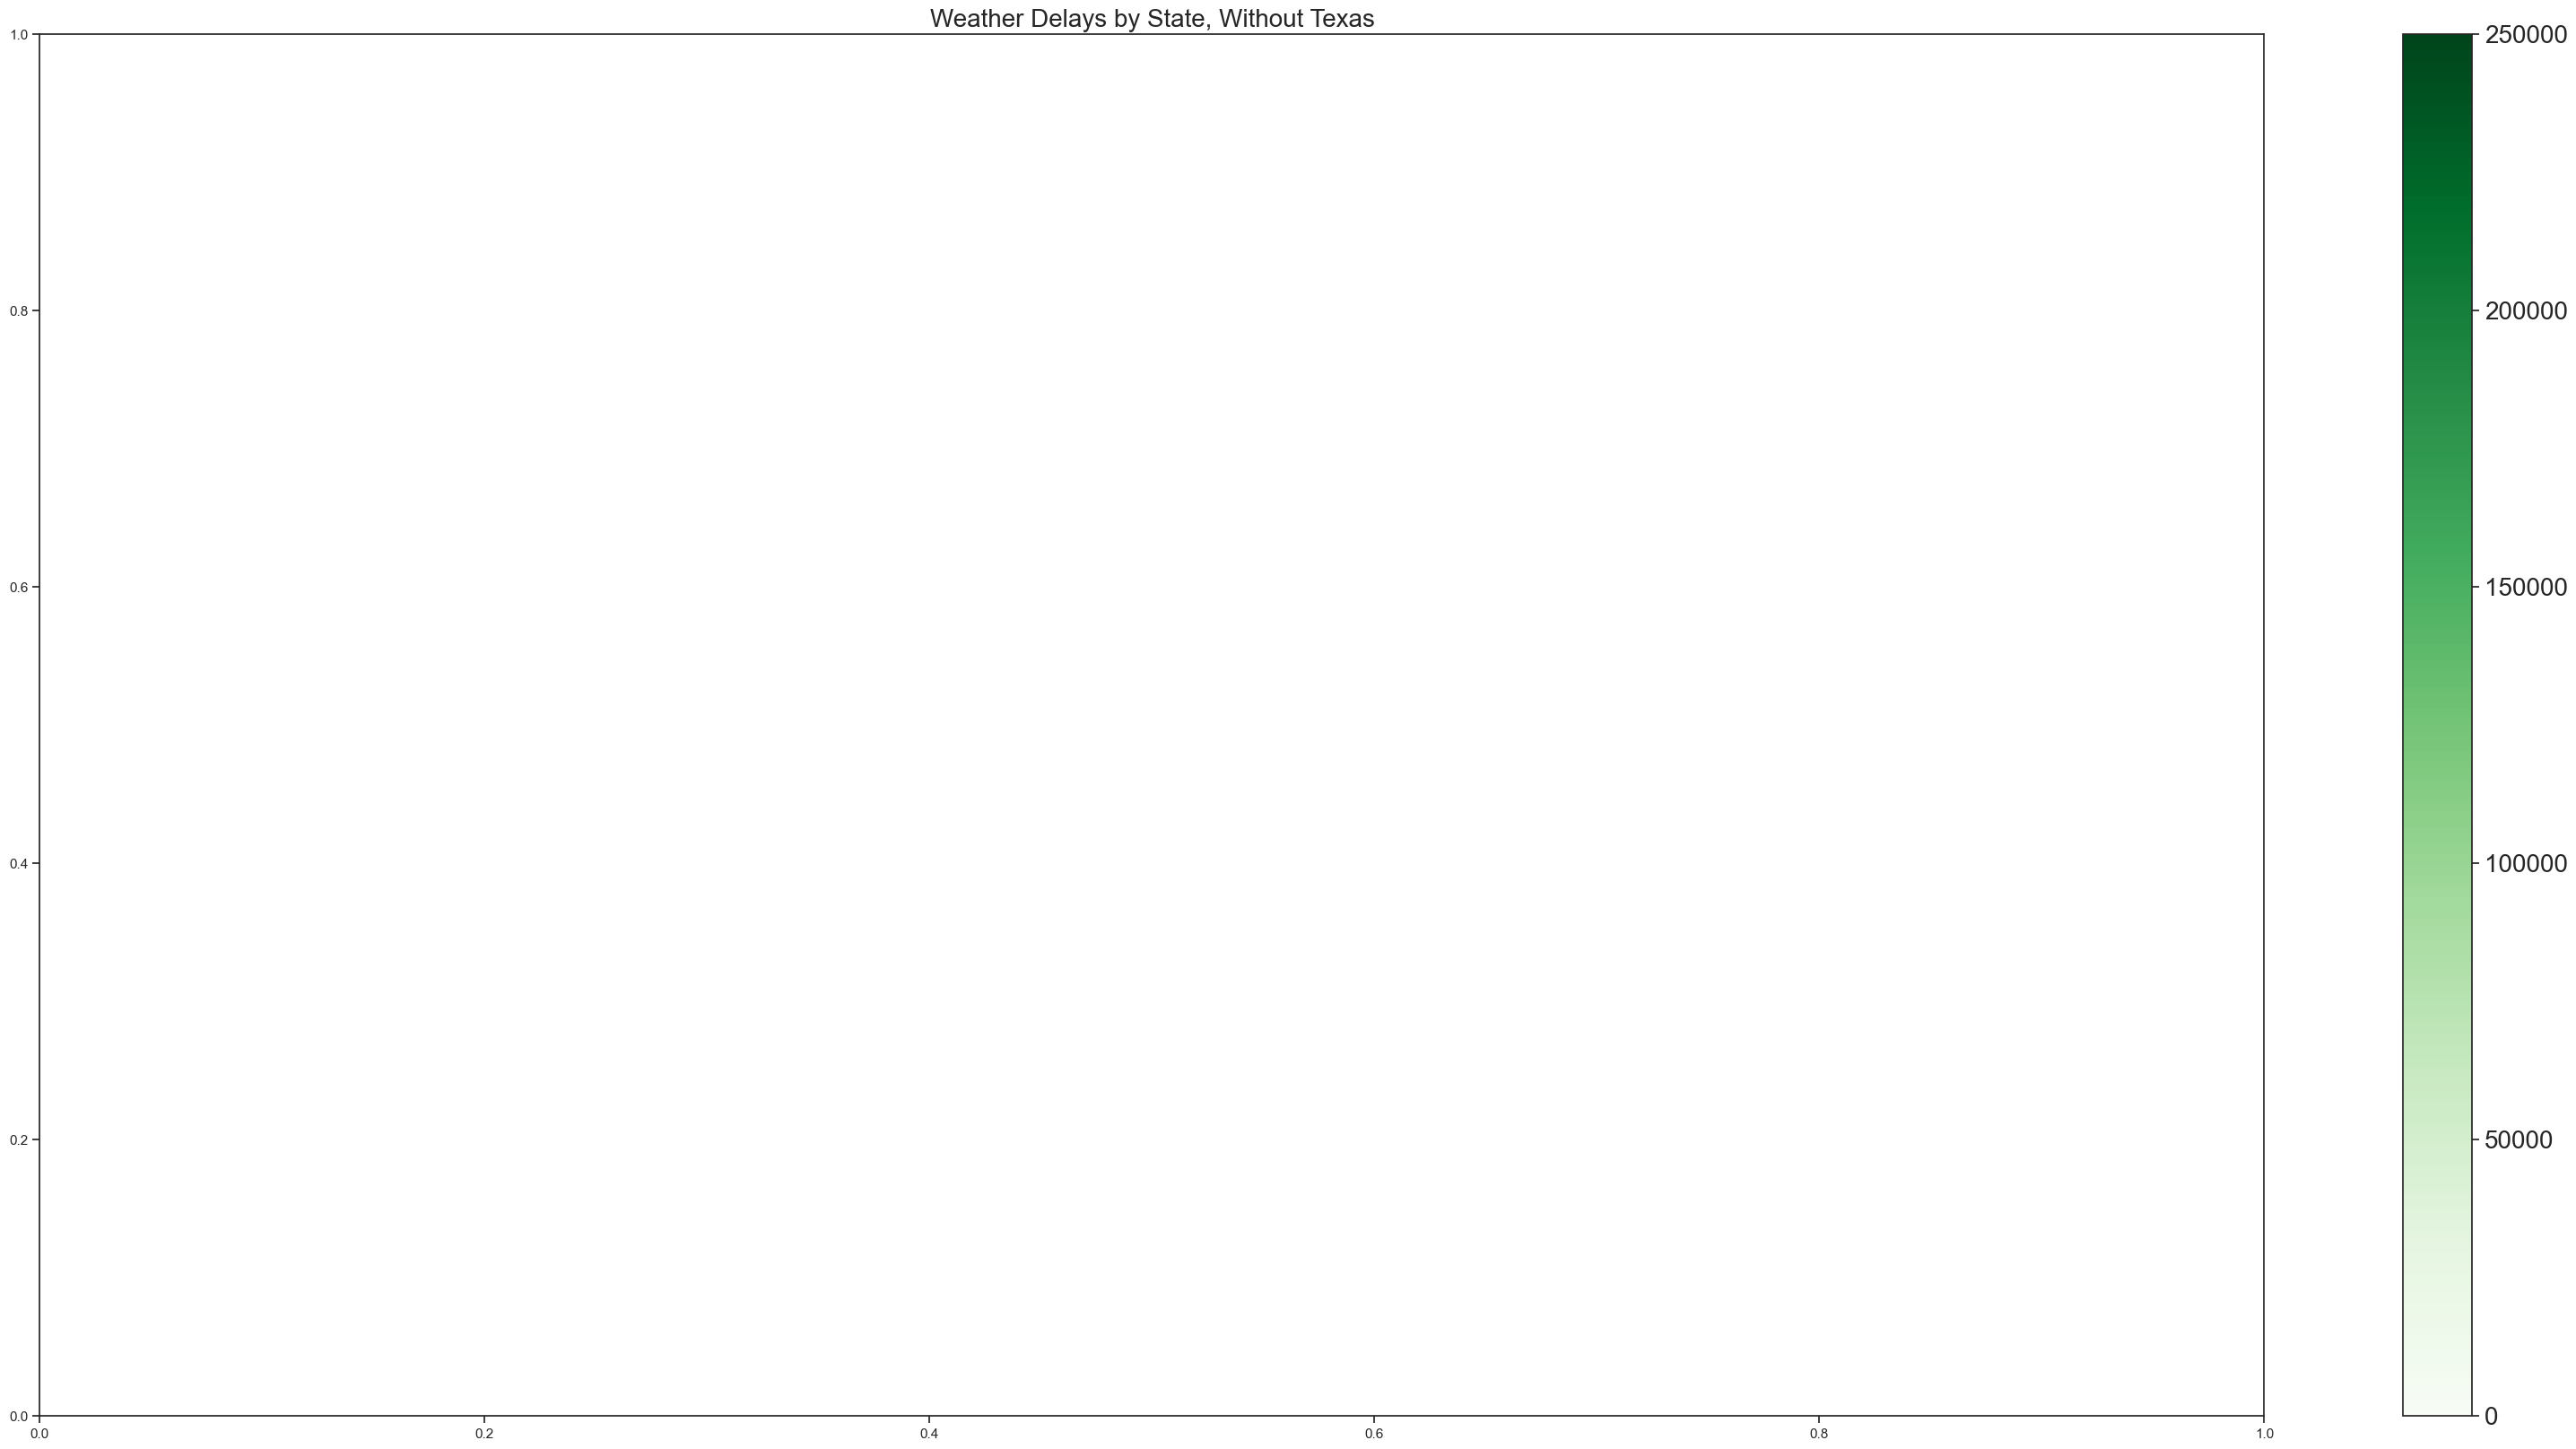

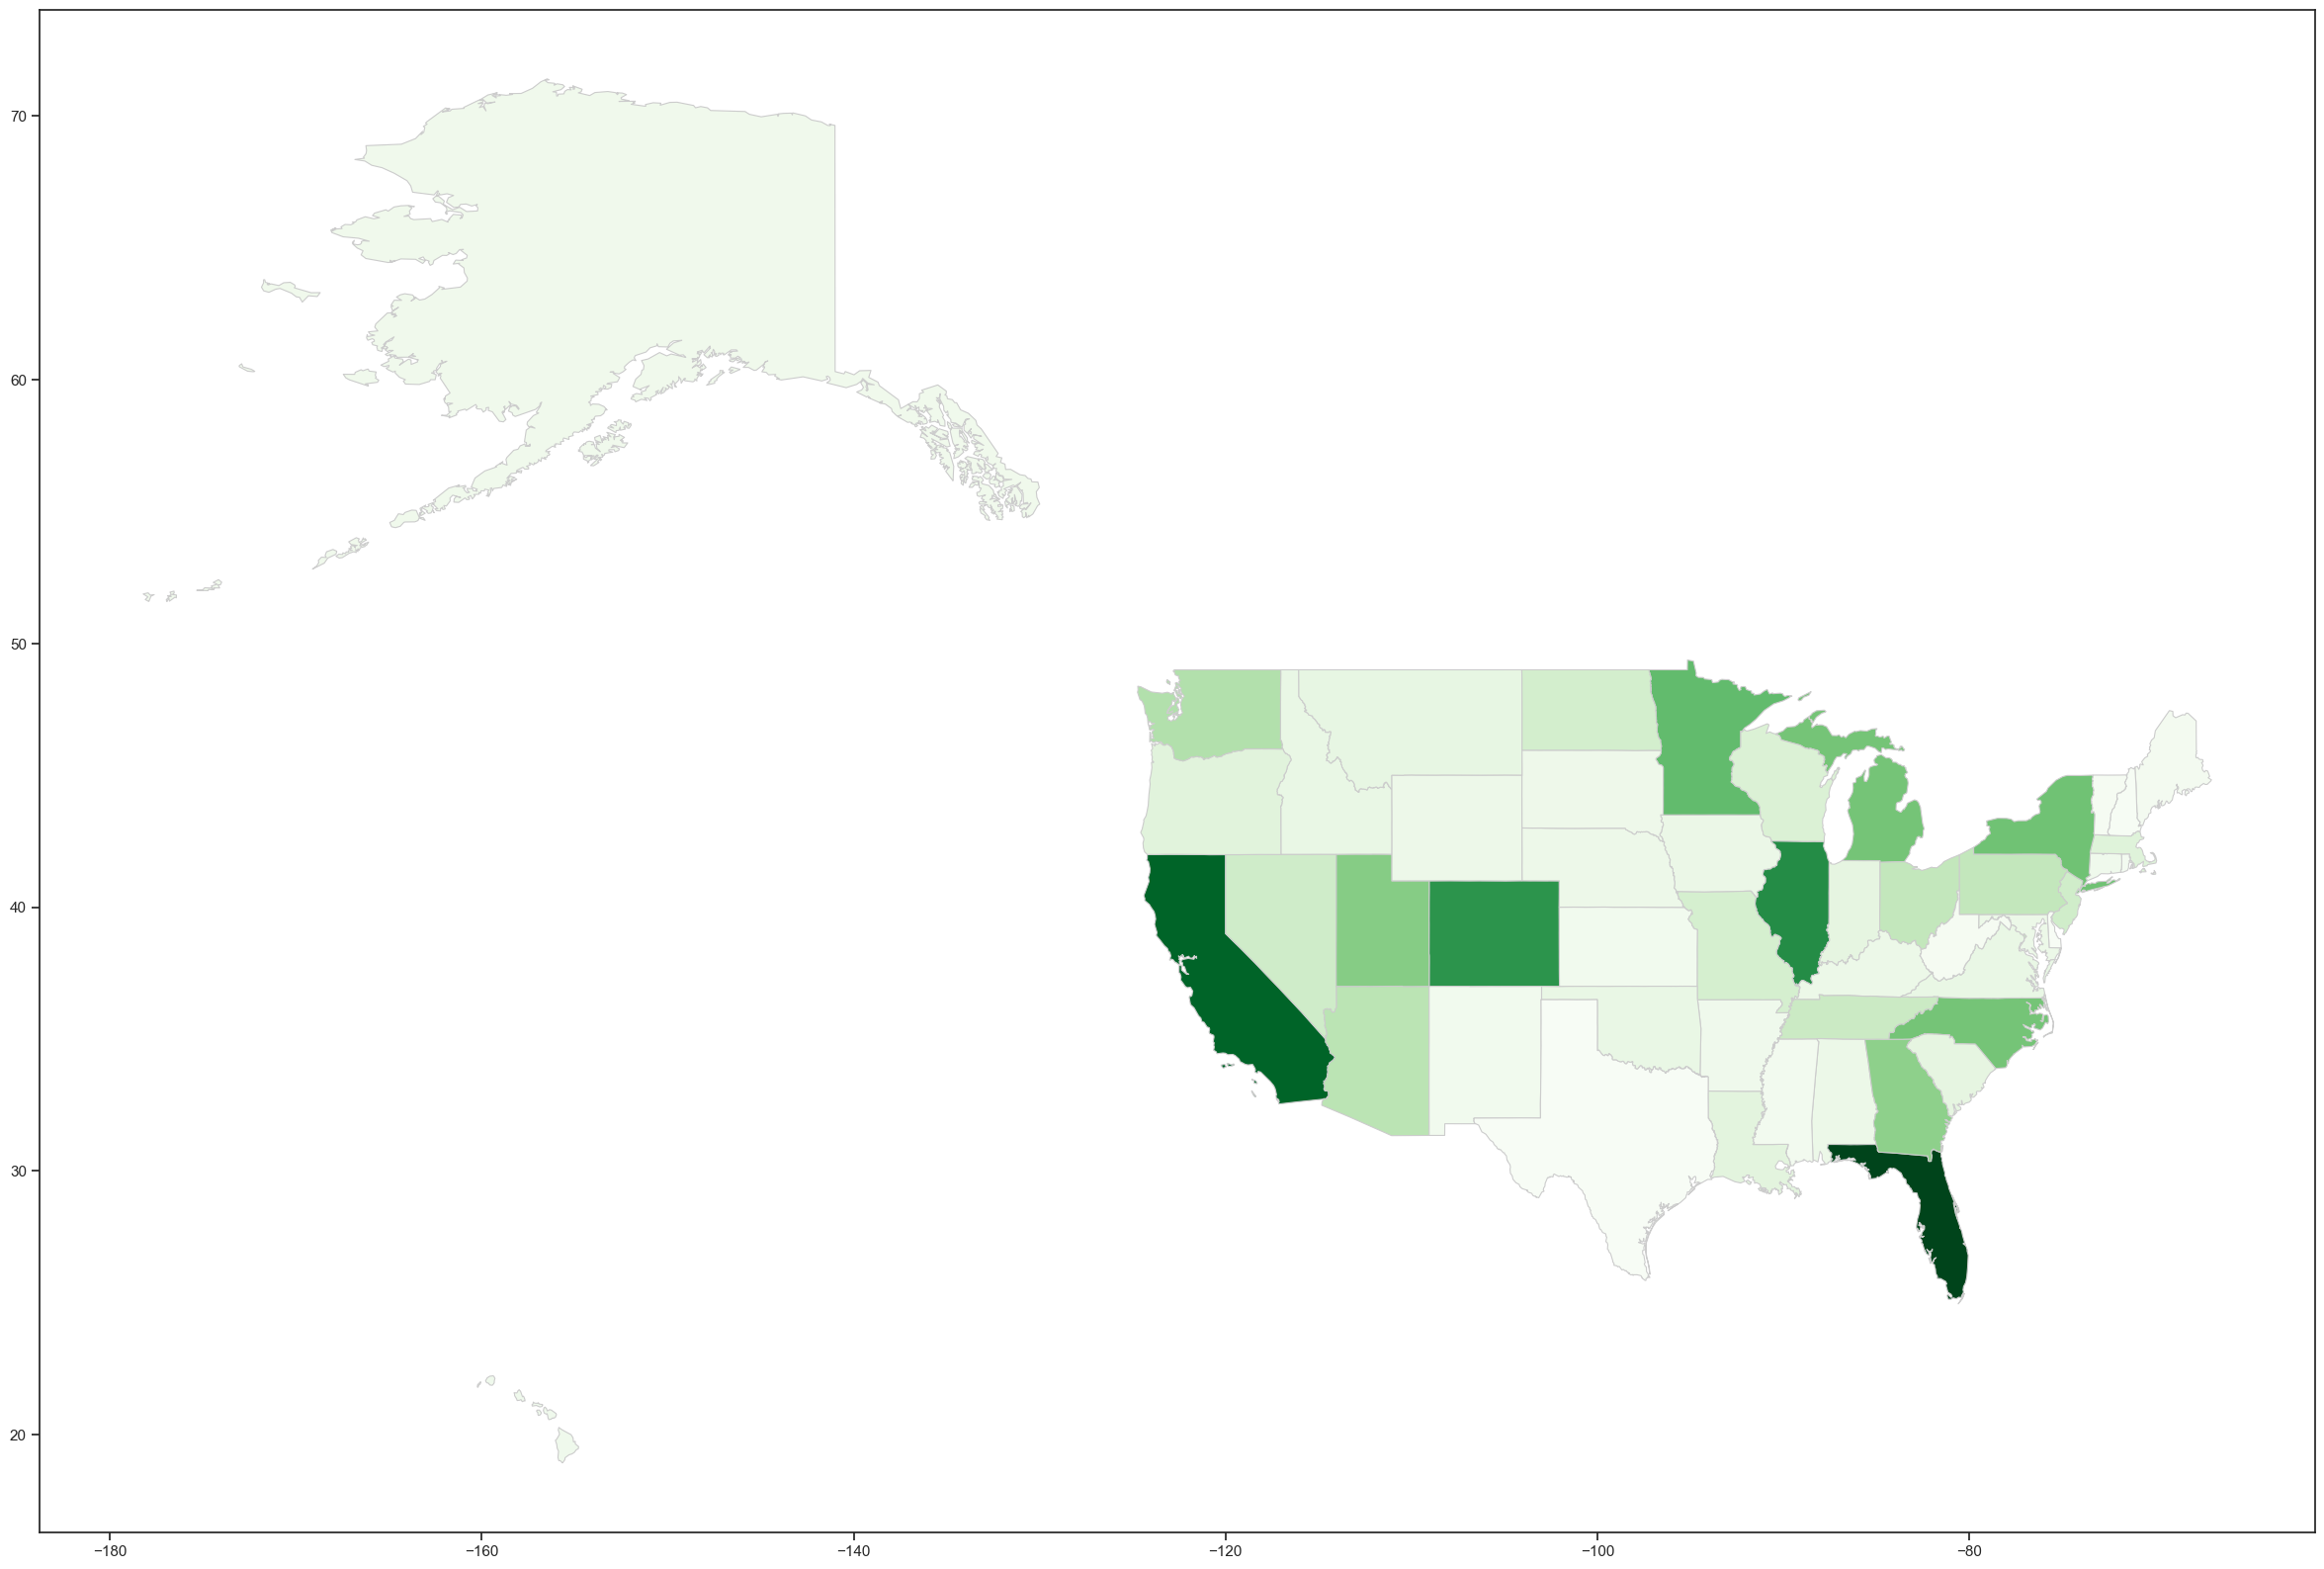

In [48]:
df4=df3[df3['Statecode'].str.contains('TX')==False]
merged1 = us_map.set_index('Statecode').join(df4.set_index('Statecode'))
merged1 = merged1.reset_index()
merged1 = merged1.fillna(0)
fig, ax1 = plt.subplots(1, figsize=(40, 20))
ax1.axis('on')
ax1.set_title('Weather Delays by State, Without Texas', fontdict={'fontsize': '20', 'fontweight' : '3'})
color = 'Greens'
vmin, vmax = 0, 250000
sm1 = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm1._A = []
cbar1 = fig.colorbar(sm1)
cbar1.ax.tick_params(labelsize=20)
merged1.plot('weather_delay', cmap=color,linewidth=0.8, edgecolor='0.8', figsize=(40,20))

In [ ]:
pv1 = airlinedata3.pivot_table("weather_delay", index = "month", columns = ["Statecode"], aggfunc = np.sum)
pv1.sort_index(inplace=True, ascending=True)
pv1= pv1.fillna(0)
import bar_chart_race as bcr
bcr.bar_chart_race(df=pv1,
filename="bcr2.gif", 
filter_column_colors=True, 
cmap='prism', sort = 'desc', 
n_bars = 10, fixed_max = True, 
period_length = 5000, 
period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Total delays: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
title='State Weather Delay by Month', figsize=(6, 4))


In [ ]:
pv2 = airlinedata1.pivot_table("late_aircraft_delay", index = "month", columns = ["carrier_name"], aggfunc = np.sum)
pv1.sort_index(inplace=True, ascending=True)
pv1= pv1.fillna(0)
bcr.bar_chart_race(df=pv2,
filename="bcr1.gif", 
filter_column_colors=True, 
cmap='prism', sort = 'desc', 
n_bars = 10, fixed_max = True, 
period_length = 4000, 
period_summary_func=lambda v, r: {'x': .98, 'y': .2, 
                                          's': f'Total delays: {v.sum():,.0f}', 
                                          'ha': 'right', 'size': 11}, 
title='Airline Late Aircraft Delay by Month', figsize=(6, 4))

#### Both the above code blocks produce the .gif files in the analysis folder.

C:\Users\maxti\AppData\Local\Temp\ipykernel_17752\3212448633.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatdf1=airlinedata2.pivot("month", "Airline", "bags_mishandled")


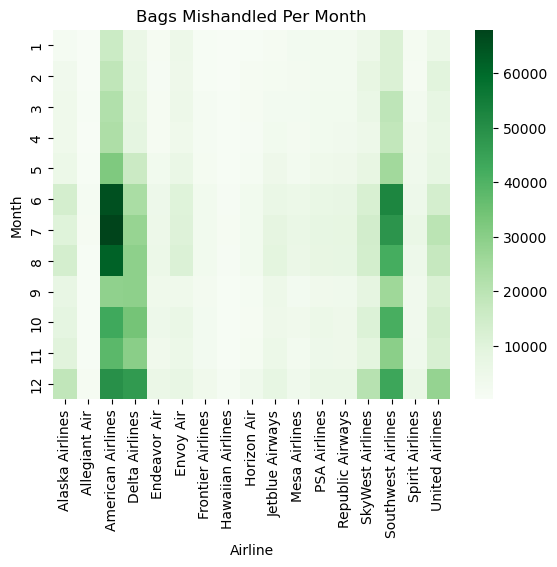

In [53]:
heatdf1=airlinedata2.pivot("month", "Airline", "bags_mishandled")
heatmap=sns.heatmap(heatdf1,cmap='Greens').set(ylabel='Month',title='Bags Mishandled Per Month')


C:\Users\maxti\AppData\Local\Temp\ipykernel_17752\2813844850.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatdf2=airlinedata2.pivot("month", "Airline", "cancelled_per_flight")


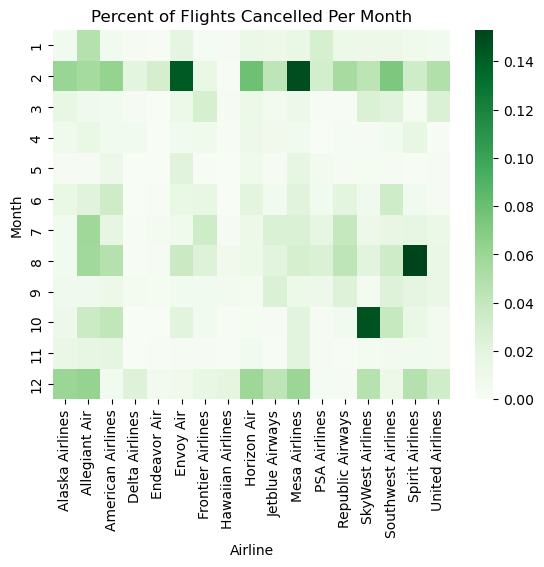

In [55]:
heatdf2=airlinedata2.pivot("month", "Airline", "cancelled_per_flight")
heatmap1=sns.heatmap(heatdf2,cmap='Greens').set(ylabel='Month',title='Percent of Flights Cancelled Per Month')

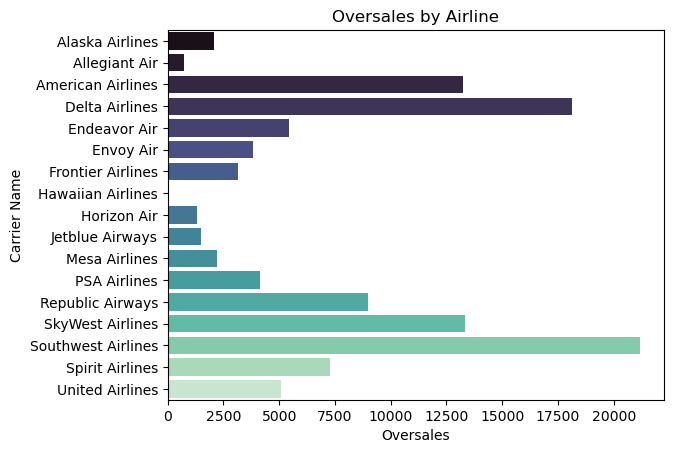

In [64]:
airlinedata2.head()
oversales=airlinedata2.groupby('Airline')['oversales'].sum().reset_index()
hist=sns.barplot(data=oversales,x='oversales',y='Airline',palette="mako").set(xlabel="Oversales",ylabel="Carrier Name",title="Oversales by Airline")

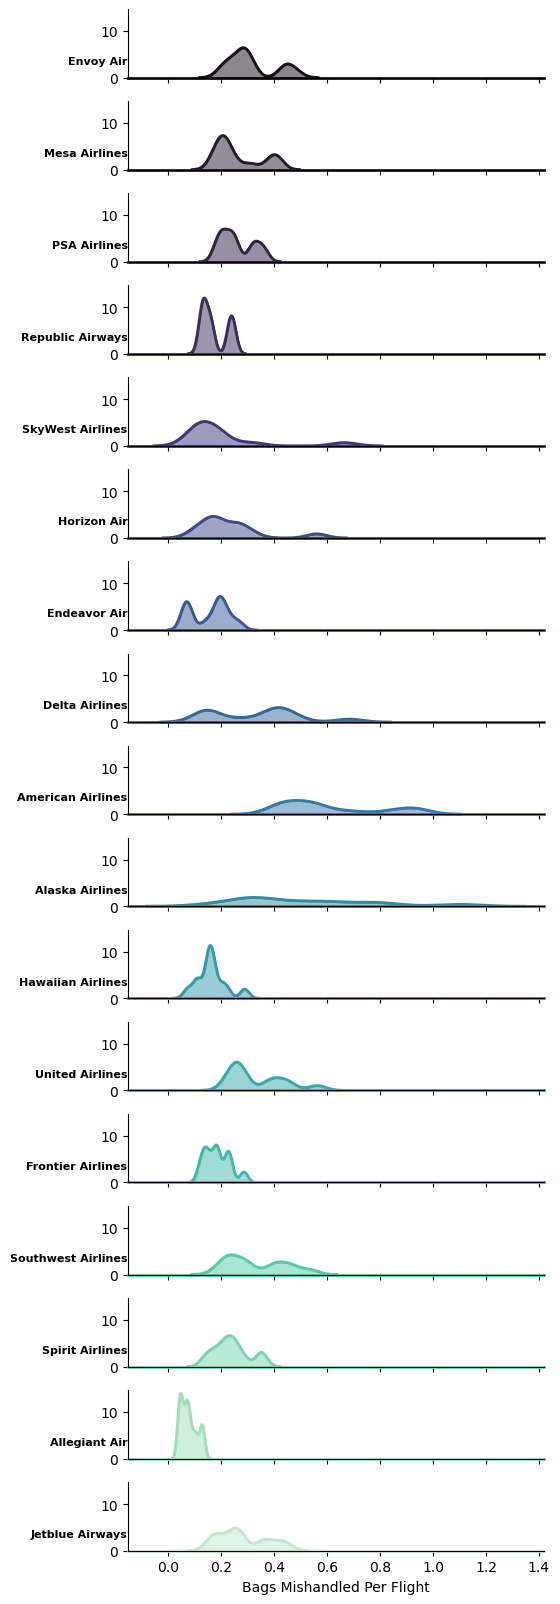

In [81]:
ridge = sns.FacetGrid(airlinedata2, row="Airline", hue="Airline", aspect=6, height=.95, palette="mako")
ridge.map(sns.kdeplot, "mishandeled_per_flight",bw_adjust=.5, clip_on=False,fill=True, alpha=.5, linewidth=1.5)
ridge.map(sns.kdeplot, "mishandeled_per_flight", clip_on=True, color=None, lw=2, bw_adjust=.5)
ridge.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color='black',
            ha="right",fontsize=8, va="baseline", transform=ax.transAxes)
ridge.map(label, "mishandeled_per_flight")
ridge.figure.subplots_adjust(hspace=-.5)
ridge.set_titles("")
ridge.set(ylabel="",xlabel="Bags Mishandled Per Flight")
ridge.despine(bottom=False, left=False)
ridge.tight_layout()